# Proyecto 1 - Explorando los Algoritmos de Aprendizaje Supervisado
## Juan Ignacio Navarro
## Jose David Sánchez
## Steven Badilla

### Implementación de los algoritmos de aprendizaje supervisado
* Regresión Logística

In [166]:
# Algoritmo de regresión logística

* Árboles de decisión

In [167]:
# Algoritmo de árboles de decision

* KNN

In [168]:
# Algoritmo de KNN

### Prueba de los algoritmos con set de datos

* Set de datos de Red Wine Quality

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


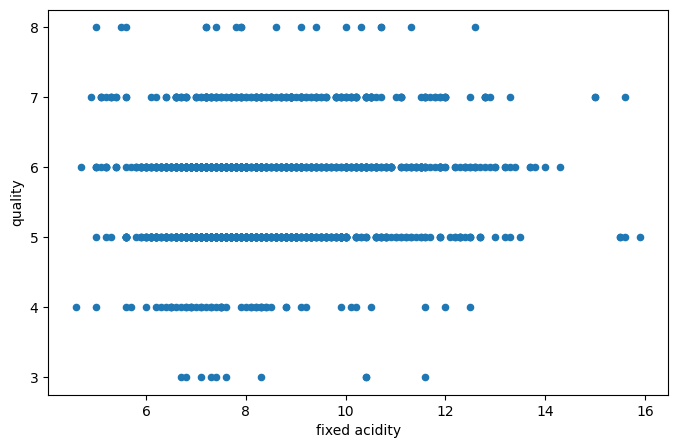

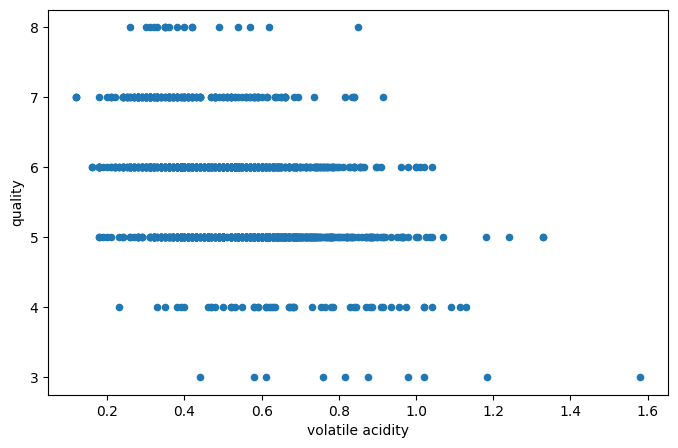

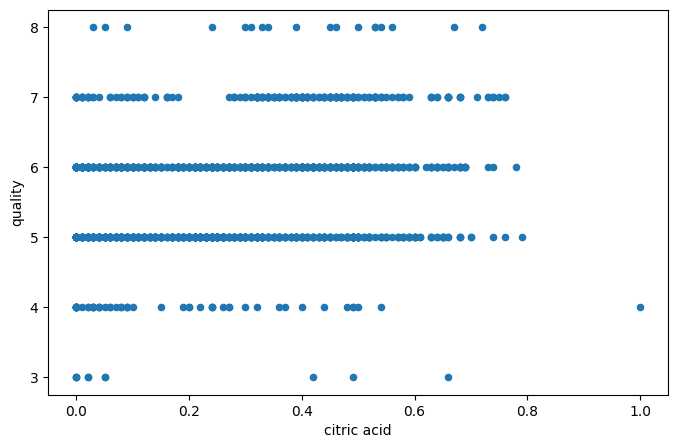

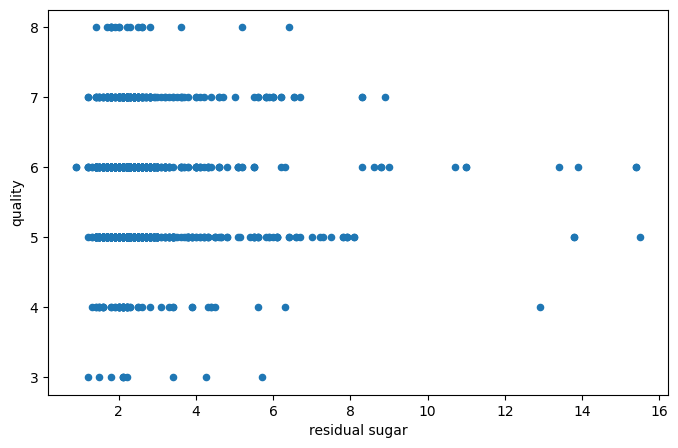

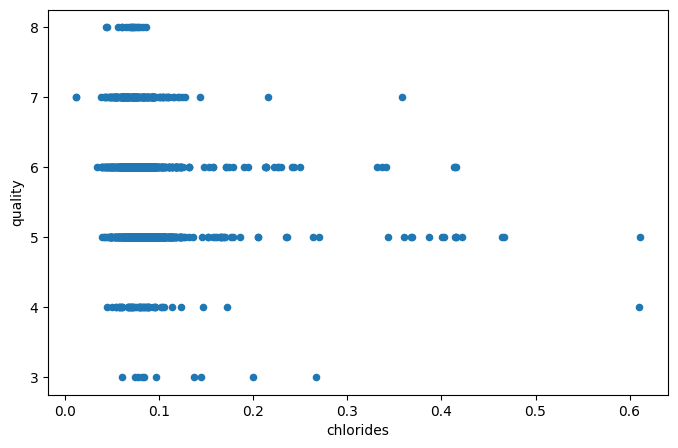

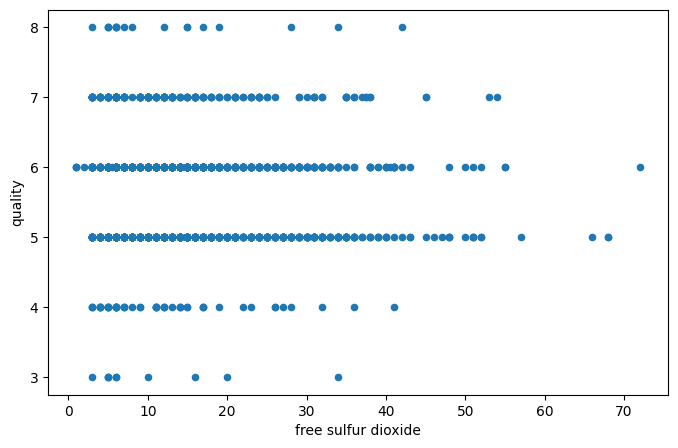

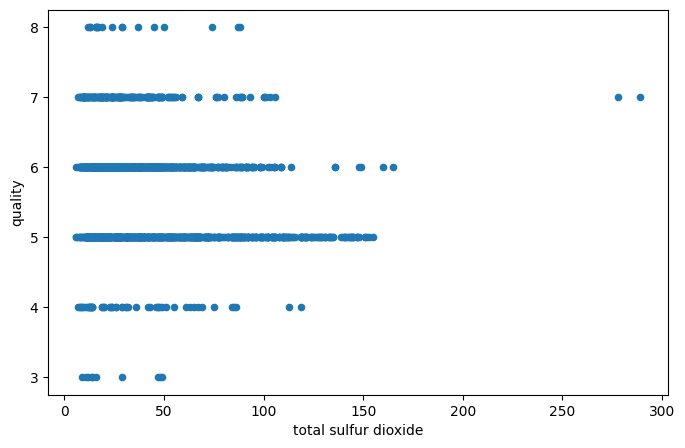

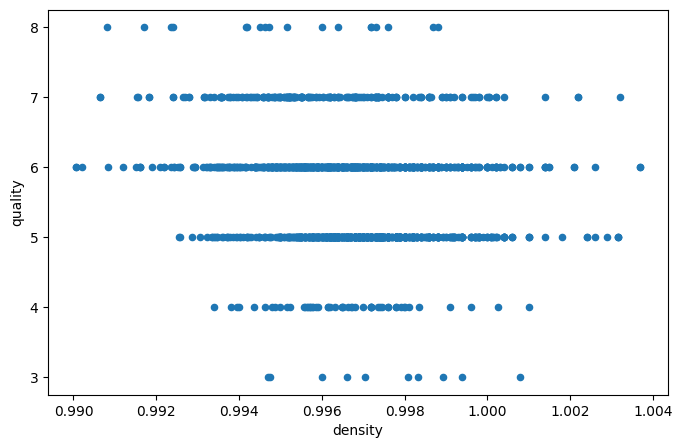

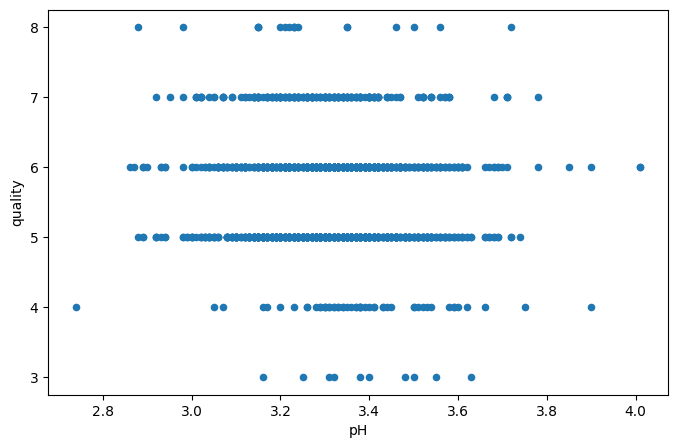

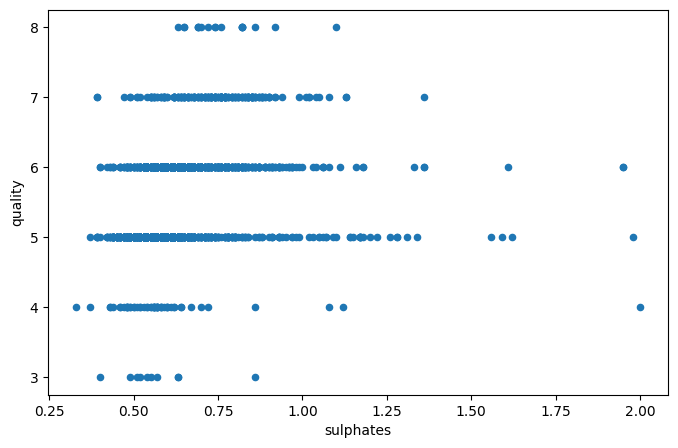

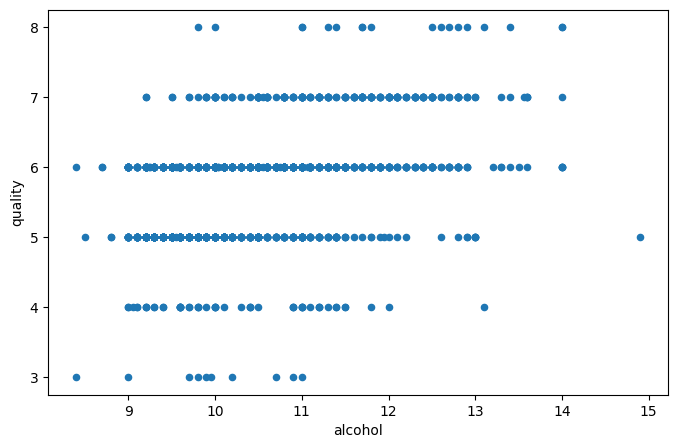

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# read the data set
df_wine = pd.read_csv('datasets/winequality-red.csv')

# make sure that there are no null values that can affect the models
mask = df_wine.isnull()
print(mask.sum())

# visualizing the values of each feature and the comparison to the output
for col in df_wine.columns[:-1]:
    df_wine.plot(x=col, y='quality', kind='scatter', figsize=(8, 5))
plt.show()

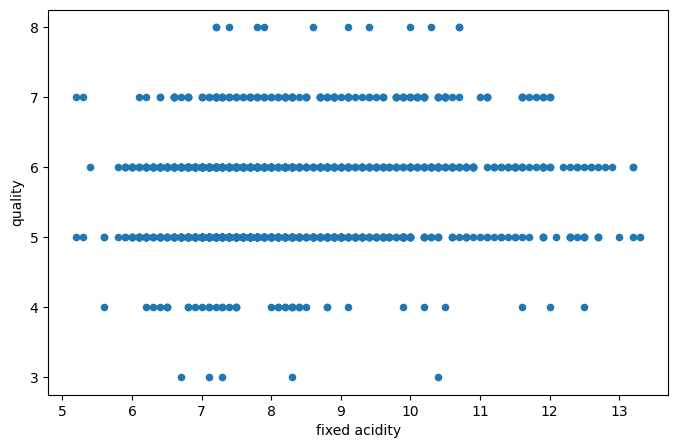

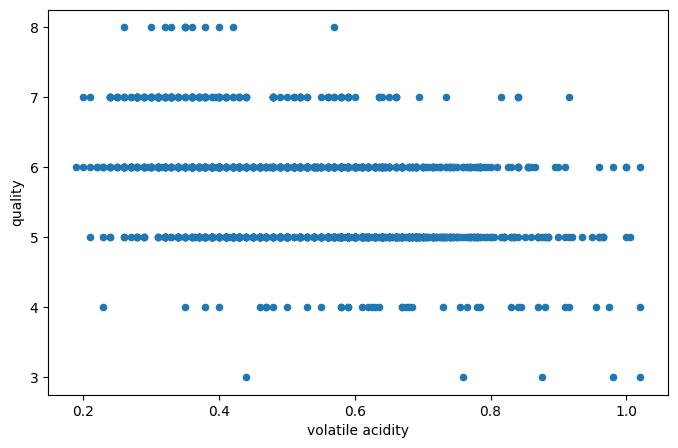

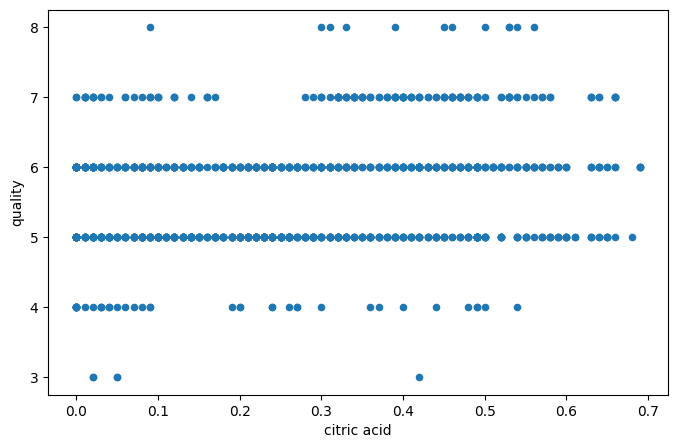

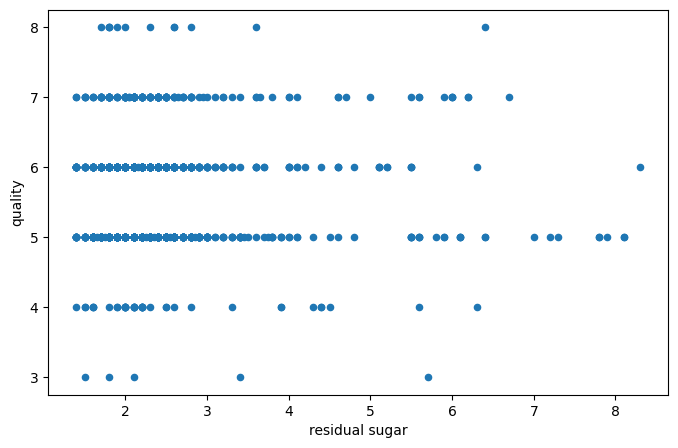

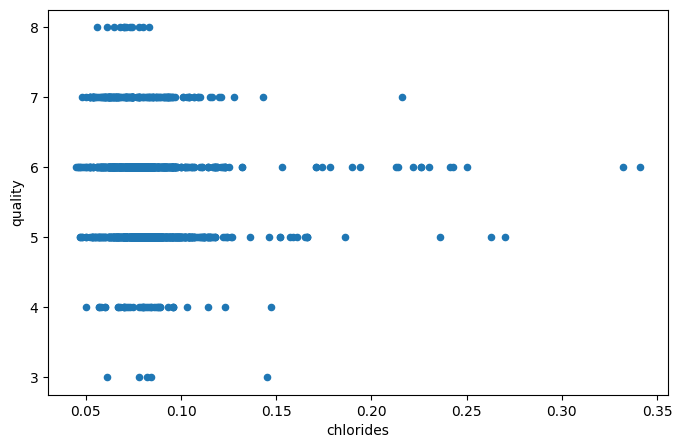

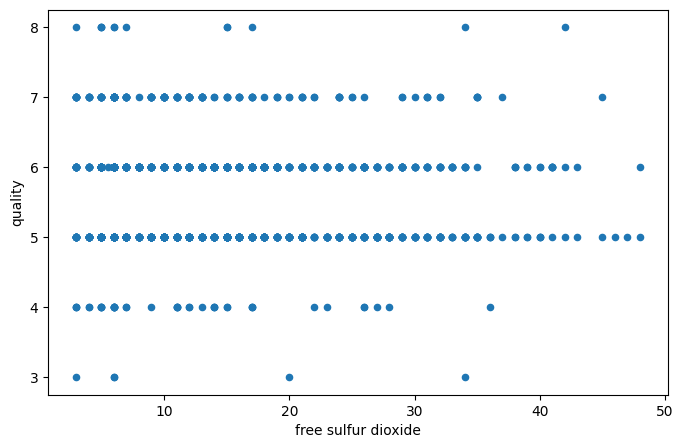

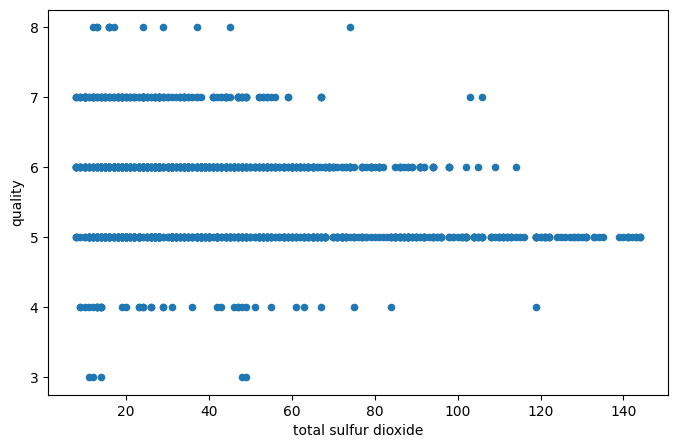

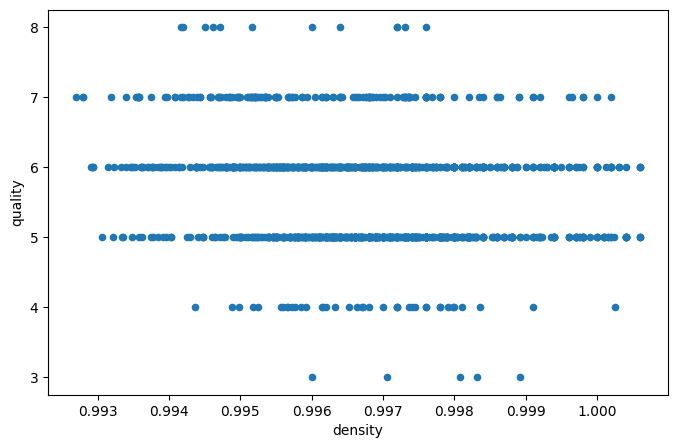

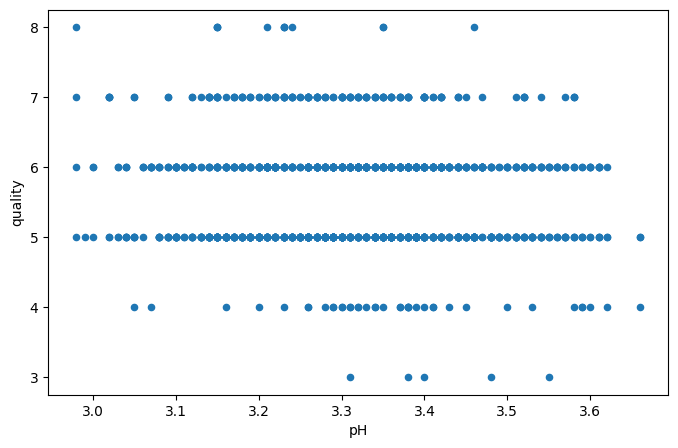

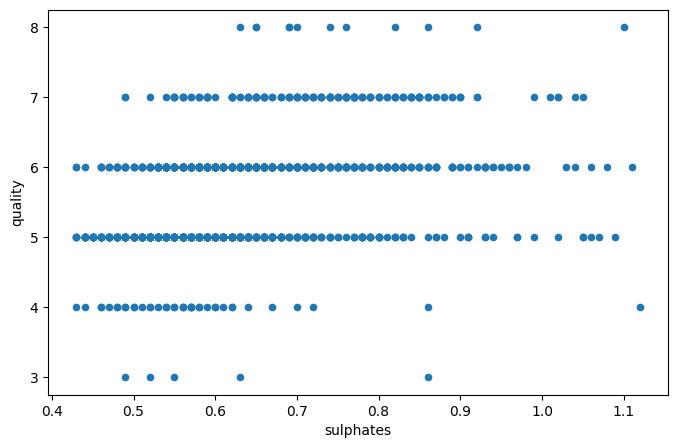

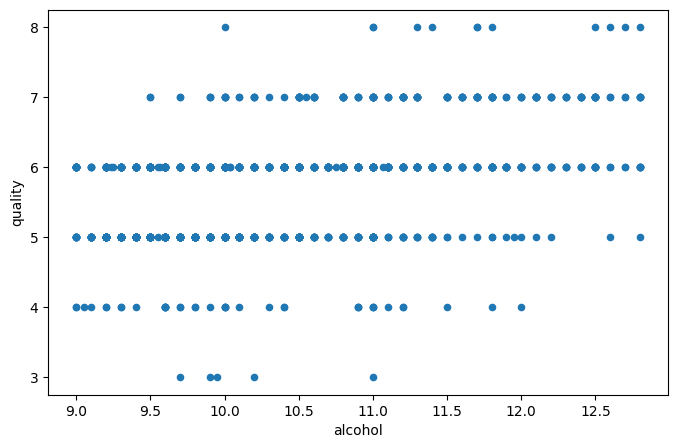

In [170]:
"""
Data preprocessing - outlier treatment
eliminating items from outside from of the 
1.5 * Inter Quartile Range (0.125% to 0.875% of the data)
"""
l_limit_perc = 0.01
h_limit_perc = 0.99

# fixed acidity
low_limit = df_wine['fixed acidity'].quantile(l_limit_perc)
high_limit = df_wine['fixed acidity'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['fixed acidity'] >= low_limit) & (df_wine['fixed acidity'] <= high_limit)]

# volatile acidity
low_limit = df_wine['volatile acidity'].quantile(l_limit_perc)
high_limit = df_wine['volatile acidity'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['volatile acidity'] >= low_limit) & (df_wine['volatile acidity'] <= high_limit)]

# citric acid
low_limit = df_wine['citric acid'].quantile(l_limit_perc)
high_limit = df_wine['citric acid'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['citric acid'] >= low_limit) & (df_wine['citric acid'] <= high_limit)]

# residual sugar
low_limit = df_wine['residual sugar'].quantile(l_limit_perc)
high_limit = df_wine['residual sugar'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['residual sugar'] >= low_limit) & (df_wine['residual sugar'] <= high_limit)]

# chlorides
low_limit = df_wine['chlorides'].quantile(l_limit_perc)
high_limit = df_wine['chlorides'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['chlorides'] >= low_limit) & (df_wine['chlorides'] <= high_limit)]

# free sulfur dioxide
low_limit = df_wine['free sulfur dioxide'].quantile(l_limit_perc)
high_limit = df_wine['free sulfur dioxide'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['free sulfur dioxide'] >= low_limit) & (df_wine['free sulfur dioxide'] <= high_limit)]

# total sulfur dioxide
low_limit = df_wine['total sulfur dioxide'].quantile(l_limit_perc)
high_limit = df_wine['total sulfur dioxide'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['total sulfur dioxide'] >= low_limit) & (df_wine['total sulfur dioxide'] <= high_limit)]

# density
low_limit = df_wine['density'].quantile(l_limit_perc)
high_limit = df_wine['density'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['density'] >= low_limit) & (df_wine['density'] <= high_limit)]

# pH
low_limit = df_wine['pH'].quantile(l_limit_perc)
high_limit = df_wine['pH'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['pH'] >= low_limit) & (df_wine['pH'] <= high_limit)]

# sulphates
low_limit = df_wine['sulphates'].quantile(l_limit_perc)
high_limit = df_wine['sulphates'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['sulphates'] >= low_limit) & (df_wine['sulphates'] <= high_limit)]

# alcohol
low_limit = df_wine['alcohol'].quantile(l_limit_perc)
high_limit = df_wine['alcohol'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['alcohol'] >= low_limit) & (df_wine['alcohol'] <= high_limit)]

# visualizing the values of each feature and the comparison to the output
for col in df_wine.columns[:-1]:
    df_wine.plot(x=col, y='quality', kind='scatter', figsize=(8, 5))
plt.show()

In [171]:
# Feature engineering 
df_wine['alcohol'] = (df_wine['alcohol']-df_wine['alcohol'].mean())/df_wine['alcohol'].std()
df_wine['chlorides'] = (df_wine['chlorides']-df_wine['chlorides'].mean())/df_wine['chlorides'].std()
df_wine['citric acid'] = (df_wine['citric acid']-df_wine['citric acid'].mean())/df_wine['citric acid'].std()
df_wine['density'] = (df_wine['density']-df_wine['density'].mean())/df_wine['density'].std()
df_wine['fixed acidity'] = (df_wine['fixed acidity']-df_wine['fixed acidity'].mean())/df_wine['fixed acidity'].std()
df_wine['free sulfur dioxide'] = (df_wine['free sulfur dioxide']-df_wine['free sulfur dioxide'].mean())/df_wine['free sulfur dioxide'].std()
df_wine['pH'] = (df_wine['pH']-df_wine['pH'].mean())/df_wine['pH'].std()
df_wine['residual sugar'] = (df_wine['residual sugar']-df_wine['residual sugar'].mean())/df_wine['residual sugar'].std()
df_wine['sulphates'] = (df_wine['sulphates']-df_wine['sulphates'].mean())/df_wine['sulphates'].std()
df_wine['total sulfur dioxide'] = (df_wine['total sulfur dioxide']-df_wine['total sulfur dioxide'].mean())/df_wine['total sulfur dioxide'].std()
df_wine['volatile acidity'] = (df_wine['volatile acidity']-df_wine['volatile acidity'].mean())/df_wine['volatile acidity'].std()

# change the value of the output to only two values
# 0 -> bad wine, wines with 3, 4 and 5 in quality
# 1 -> good wine, wines with 6, 7 and 8 in queality
df_wine.loc[df_wine['quality'] <= 5, 'quality'] = 0
df_wine.loc[df_wine['quality'] > 5, 'quality'] = 1

df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.565253,1.059618,-1.411229,-0.553438,-0.287522,-0.479510,-0.355404,0.672341,1.474535,-0.638760,-1.000675,0
1,-0.304938,2.161772,-1.411229,0.207560,0.571559,1.031186,0.767153,0.024570,-0.872713,0.332310,-0.574418,0
2,-0.304938,1.427003,-1.193394,-0.118582,0.337264,-0.047882,0.324934,0.154124,-0.418407,0.089543,-0.574418,0
3,1.907741,-1.512074,1.638460,-0.553438,-0.326572,0.167932,0.529035,0.801895,-1.175584,-0.476915,-0.574418,1
4,-0.565253,1.059618,-1.411229,-0.553438,-0.287522,-0.479510,-0.355404,0.672341,1.474535,-0.638760,-1.000675,0
5,-0.565253,0.814695,-1.411229,-0.662152,-0.326572,-0.263696,-0.151302,0.672341,1.474535,-0.638760,-1.000675,0
6,-0.239859,0.447311,-1.084476,-0.879580,-0.560867,-0.047882,0.495018,-0.234539,-0.115536,-1.447985,-1.000675,0
8,-0.304938,0.324849,-1.302311,-0.444724,-0.404670,-0.695323,-0.899674,0.024570,0.338770,-0.557837,-0.894111,1
9,-0.500174,-0.164997,0.549286,4.012548,-0.482768,0.167932,1.957744,0.672341,0.263052,1.303380,0.171531,0
10,-1.020805,0.324849,-0.975559,-0.662152,0.532510,-0.047882,0.699120,-0.558425,-0.266972,-0.800605,-1.213804,0


In [172]:
# Define the training and test set

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X0 = df_wine.loc[df_wine['quality'] == 0, features]
Y0 = df_wine.loc[df_wine['quality'] == 0, 'quality']

X1 = df_wine.loc[df_wine['quality'] == 1, features]
Y1 = df_wine.loc[df_wine['quality'] == 1, 'quality']

test_percentage = 0.2

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, Y0, test_size=test_percentage, random_state=45)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=test_percentage, random_state=45)

X_train = pd.concat([X0_train, X1_train], axis= 0)
X_test = pd.concat([X0_test, X1_test], axis= 0)
y_train = pd.concat([y0_train, y1_train], axis= 0)
y_test = pd.concat([y0_test, y1_test], axis= 0)

* Set de datos de notas del curso de Arquitectura de Computadores I - Semestre 1, 2021

In [173]:
# read the data set
df_2021_s1_grades = pd.read_csv('datasets/2021-s1.csv', sep=";")

# make sure that there are no null values that can affect the models
mask = df_2021_s1_grades.isnull()
print(mask.sum())

df_2021_s1_grades = df_2021_s1_grades.drop('Tarea 2 Entrega 0.0%', axis=1)
df_2021_s1_grades = df_2021_s1_grades.drop('Proyecto Individual Viernes 0.0%', axis=1)
df_2021_s1_grades = df_2021_s1_grades.drop('Proyecto Individual Lunes 0.0%', axis=1)
df_2021_s1_grades = df_2021_s1_grades.drop('Exposición', axis=1)

# Arranging cols
col_Investi = df_2021_s1_grades.pop('Total: Investigación 5.0%')  # Cut col
df_2021_s1_grades.insert(14, 'Total: Investigación 5.0%', col_Investi)  # Insert col

df_2021_s1_grades.head(30)

Examen 1 15.0%                          0
Examen 2 Práctico 5.0%                  0
Examen 2 Teórico 10.0%                  0
Total: Exámenes 30.0%                   0
Tarea 1 3.75%                           0
Tarea 2 Entrega 0.0%                    0
Tarea 2 Evaluación 3.75%                0
Total: Tareas 7.5%                      0
Proyecto Individual Docu 3.75%          0
Proyecto Individual Funcional 11.25%    0
Proyecto Individual Viernes 0.0%        0
Proyecto Individual Lunes 0.0%          0
Proyecto Grupal 1 Funcional 13.12%      0
Proyecto Grupal 1 Docu 4.38%            0
Proyecto Grupal 2 Funcional 13.12%      0
Proyecto Grupal 2 Docu 4.38%            0
Total: Proyectos 50.0%                  0
Taller 1                                0
Taller 2                                0
Taller 3                                0
Taller 4                                0
Taller 5                                0
Total: Taller 7.5%                      0
Exposición                        

,Examen 1 15.0%,Examen 2 Práctico 5.0%,Examen 2 Teórico 10.0%,Total: Exámenes 30.0%,Tarea 1 3.75%,Tarea 2 Evaluación 3.75%,Total: Tareas 7.5%,Proyecto Individual Docu 3.75%,Proyecto Individual Funcional 11.25%,Proyecto Grupal 1 Funcional 13.12%,...,Total: Proyectos 50.0%,Total: Investigación 5.0%,Taller 1,Taller 2,Taller 3,Taller 4,Taller 5,Total: Taller 7.5%,Total:,Final
0,53.3,13.1,58.3,14.48,76.0,100.0,6.60,77.0,100.0,100.0,...,48.41,5.0,80.0,100.0,100.0,0.0,100.0,5.70,80.2,80.0
1,12.6,,,1.89,0.0,,0.00,,0.0,,...,0.00,0.0,40.0,0.0,0.0,0.0,0.0,0.60,2.5,5.0
2,49.6,100.0,68.3,26.71,100.0,,3.75,100.0,100.0,45.0,...,39.30,5.0,100.0,100.0,100.0,100.0,0.0,6.00,80.8,80.0
3,,,,0.00,0.0,0.0,0.00,,,,...,0.00,0.0,,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,61.6,,58.3,15.07,66.7,100.0,6.25,100.0,100.0,100.0,...,49.27,5.0,100.0,100.0,36.7,100.0,100.0,6.55,82.1,80.0
5,55.1,72.1,48.3,16.70,24.0,93.7,4.41,92.3,42.5,60.0,...,36.24,5.0,100.0,100.0,70.8,100.0,100.0,7.06,69.4,70.0
6,38.5,76.4,78.3,23.20,48.0,100.0,5.55,100.0,45.3,60.0,...,36.72,4.7,100.0,92.3,100.0,66.7,70.0,6.44,76.6,75.0
7,57.0,72.1,,12.16,0.0,100.0,3.75,100.0,100.0,60.0,...,42.87,4.7,100.0,80.0,100.0,100.0,100.0,7.20,70.7,70.0
8,52.4,13.1,55.0,14.02,66.7,100.0,6.25,100.0,80.0,100.0,...,47.02,5.0,100.0,100.0,100.0,66.7,100.0,7.00,79.3,80.0
9,40.3,76.4,58.3,15.70,48.0,100.0,5.55,92.3,79.3,62.0,...,37.40,4.7,80.0,0.0,100.0,100.0,0.0,4.20,67.6,70.0


* Set de datos de notas del curso de Arquitectura de Computadores I - Semestre 2, 2021

In [174]:
# read the data set
df_2021_s2_grades = pd.read_csv('datasets/2021-s2.csv', sep=";")

# make sure that there are no null values that can affect the models
mask = df_2021_s2_grades.isnull()
print(mask.sum())

df_2021_s2_grades = df_2021_s2_grades.drop('Examen 2 Práctico Ext 0.25%', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Proyecto Individual Entrega V 0.0%', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Proyecto Individual Entrega M 0.0%', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Entrega', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen 1', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen 2', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen 3', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen 4', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Total: Extra 2.0%', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Total: Extra 5 noviembre 1.0%', axis=1)

df_2021_s2_grades.head(25)

Examen 1 15.0%                          0
Examen 2 Práctico 5.0%                  0
Examen 2 Teórico 10.0%                  0
Examen 2 Práctico Ext 0.25%             0
Total: Exámenes 30.25%                  0
Tarea 1                                 0
Tarea 2                                 0
Total: Tareas 7.5%                      0
Proyecto Indiviual Docu 3.75%           0
Proyecto Individual Funcional 11.25%    0
Proyecto Individual Entrega V 0.0%      0
Proyecto Individual Entrega M 0.0%      0
Proyecto Grupal 1 Funcional 13.12%      0
Proyecto Grupal 1 Docu 4.38%            0
Proyecto Grupal 2 Funcional 13.12%      0
Proyecto Grupal 2 Docu 4.38%            0
Total: Proyectos 50.0%                  0
Entrega                                 0
Total: Investigación 5.0%               0
Taller 1                                0
Taller 2                                0
Taller 3                                0
Taller 4                                0
Taller 5                          

,Examen 1 15.0%,Examen 2 Práctico 5.0%,Examen 2 Teórico 10.0%,Total: Exámenes 30.25%,Tarea 1,Tarea 2,Total: Tareas 7.5%,Proyecto Indiviual Docu 3.75%,Proyecto Individual Funcional 11.25%,Proyecto Grupal 1 Funcional 13.12%,...,Total: Proyectos 50.0%,Total: Investigación 5.0%,Taller 1,Taller 2,Taller 3,Taller 4,Taller 5,Total: Talleres 7.5%,Total:,Final
0,74.4,83.3,81.0,23.68,100.0,93.7,7.26,100.0,100.0,100.0,...,49.66,5.0,100.0,100.0,100.0,93.3,100.0,7.40,96.00,95.0
1,41.0,76.7,52.4,15.43,,62.0,2.33,69.3,43.0,60.0,...,34.03,5.0,81.7,37.7,92.5,93.3,86.7,5.88,64.97,65.0
2,34.0,75.0,57.2,14.57,53.3,92.0,5.45,100.0,50.0,100.0,...,44.38,5.0,100.0,100.0,92.5,100.0,90.0,7.24,79.64,80.0
3,16.7,0.0,0.0,2.51,0.0,74.7,2.80,30.7,38.0,0.0,...,5.43,0.0,10.0,53.3,,,,0.95,11.69,10.0
4,9.0,0.0,0.0,1.35,38.7,93.7,4.97,0.0,20.0,0.0,...,2.25,0.0,81.7,,,,,1.23,10.80,10.0
5,77.6,100.0,69.0,23.79,90.7,100.0,7.15,100.0,100.0,100.0,...,49.66,5.0,100.0,100.0,100.0,100.0,100.0,7.50,96.10,95.0
6,28.9,86.7,52.4,14.16,,87.3,3.27,100.0,67.0,60.0,...,37.88,5.0,95.0,95.3,85.0,100.0,100.0,7.13,70.44,70.0
7,61.5,83.3,59.5,19.59,100.0,93.7,7.26,92.3,98.0,100.0,...,49.15,5.0,100.0,100.0,100.0,100.0,100.0,7.50,91.50,90.0
8,19.2,76.7,52.4,12.16,,43.0,1.61,53.7,48.0,60.0,...,34.00,5.0,63.3,58.0,,,,1.82,54.59,55.0
9,73.7,100.0,40.5,20.36,100.0,100.0,7.50,100.0,95.0,100.0,...,49.44,5.0,100.0,100.0,100.0,100.0,100.0,7.50,91.80,90.0


* Set de datos de notas del curso de Arquitectura de Computadores I - Semestre 1, 2022

In [175]:
# read the data set
df_2022_s1_grades = pd.read_csv('datasets/2022-s1.csv', sep=";")

# make sure that there are no null values that can affect the models
mask = df_2022_s1_grades.isnull()
print(mask.sum())

# delete students from robot project (only 6 in the whole data set)
df_2022_s1_grades = df_2022_s1_grades.drop([0, 4, 10, 20, 22, 26]) 

df_2022_s1_grades = df_2022_s1_grades.drop('Tarea 1 0.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Individual Entrega V 0.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Individual Entrega L 0.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Grupal 2 Anteproyecto 1.75%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Grup 2 Funcional Rob 11.38%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Grupal 2 Docu Robot 4.37%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Entrega 0.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Evaluación 5.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Evaluación', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Total: Puntaje extra 2%', axis=1)

# Arranging cols
col_Tarea2 = df_2022_s1_grades.pop('Tarea 2 3.75%')  # Cut col
df_2022_s1_grades.insert(5, 'Tarea 2 3.75%', col_Tarea2)  # Insert col

df_2022_s1_grades.head(25)

Examen parcial 1 15%                     0
Examen parcial 2 teórico 7.50%           0
Examen parcial 2 práctico 7.50%          0
Total: Exámenes 30%                      0
Tarea 1 0.00%                            0
Tarea 2 3.75%                            0
Tarea 1 evaluación 3.75%                 0
Total: Tareas 7.5%                       0
Proyecto Individual Docu 3.75%           0
Proyecto Individual Funcional 11.25%     0
Proyecto Grupal 1 Funcional 13.12%       0
Proyecto Grupal 1 Docu 4.38%             0
Proyecto Grup 2 Funcional GEM5 13.12%    0
Proyecto Grupal 2 Docu GEM5 4.38%        0
Proyecto Individual Entrega V 0.00%      0
Proyecto Individual Entrega L 0.00%      0
Proyecto Grupal 2 Anteproyecto 1.75%     0
Proyecto Grup 2 Funcional Rob 11.38%     0
Proyecto Grupal 2 Docu Robot 4.37%       0
Total: Proyectos 67.5%                   0
Entrega 0.00%                            0
Evaluación 5.00%                         0
Total: Investigación 5%                  0
Taller 1   

,Examen parcial 1 15%,Examen parcial 2 teórico 7.50%,Examen parcial 2 práctico 7.50%,Total: Exámenes 30%,Tarea 1 evaluación 3.75%,Tarea 2 3.75%,Total: Tareas 7.5%,Proyecto Individual Docu 3.75%,Proyecto Individual Funcional 11.25%,Proyecto Grupal 1 Funcional 13.12%,...,Total: Proyectos 67.5%,Total: Investigación 5%,Taller 1,Taller 2,Taller 3,Taller 4,Taller 5,Total: Talleres 7.5%,Total:,Final
1,43.8,65.8,86.7,18.01,33.3,100.0,5.00,100.0,34.0,45.0,...,22.76,5.0,100.0,90.7,100.0,100.0,100.0,7.36,58.13,60.0
2,37.3,65.8,,10.53,9.3,,0.35,100.0,40.0,45.0,...,23.44,5.0,100.0,95.3,0.0,100.0,0.0,4.43,43.75,45.0
3,68.6,44.7,100.0,21.14,20.0,100.0,4.50,100.0,53.3,95.0,...,44.09,5.0,60.0,100.0,100.0,100.0,100.0,6.90,83.63,85.0
5,34.7,55.3,100.0,16.85,76.0,100.0,6.60,100.0,85.0,70.0,...,44.38,5.0,60.0,84.7,77.5,100.0,100.0,6.33,81.16,80.0
6,33.3,47.4,100.0,16.05,0.0,100.0,3.75,100.0,40.0,95.0,...,42.59,5.0,26.7,72.3,85.0,0.0,80.0,3.96,73.35,75.0
7,24.2,73.7,100.0,16.66,66.7,100.0,6.25,92.0,85.0,97.0,...,47.62,5.0,33.3,37.0,63.3,100.0,0.0,3.50,81.03,80.0
8,22.2,57.9,100.0,15.17,48.0,93.7,5.31,100.0,34.0,70.0,...,38.64,5.0,100.0,72.0,93.3,100.0,100.0,6.98,73.10,75.0
9,,,,0.00,9.3,,0.35,,,,...,0.00,0.0,60.0,0.0,0.0,0.0,0.0,0.90,1.25,0.0
11,22.3,57.9,100.0,15.19,24.0,100.0,4.65,100.0,85.0,70.0,...,44.38,5.0,80.0,84.7,100.0,100.0,100.0,6.97,78.19,80.0
12,56.2,94.7,100.0,23.03,100.0,100.0,7.50,100.0,82.0,97.0,...,47.58,5.0,100.0,100.0,100.0,100.0,100.0,7.50,92.61,95.0


* Set de datos de notas del curso de Arquitectura de Computadores I - Semestre 2, 2022

In [176]:
# read the data set
df_2022_s2_grades = pd.read_csv('datasets/2022-s2.csv', sep=";")

# make sure that there are no null values that can affect the models
mask = df_2022_s2_grades.isnull()
print(mask.sum())

df_2022_s2_grades = df_2022_s2_grades.drop('Examen parcial 2 práctico repo 0.00%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Examen parcial 2 prác rep eval 0.00%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Tarea 2 0.00%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Proyecto Grupal 2 Anteproyecto 1.75%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Proyecto Grupal 1 Func Eval 13.12%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Proyecto Grupal 1 Docu Eval 4.38%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Entrega', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Charla 1 Simics 0.5%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Charla 2 Ronald 0.5%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Taller Simics 2%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Extra proyecto 1.75%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Total: Extra 4.75%', axis=1)

df_2022_s2_grades.head(25)

Examen parcial 1 15%                    0
Examen parcial 2 teórico 7.5%           0
Examen parcial 2 práctico 7.50%         0
Examen parcial 2 práctico repo 0.00%    0
Examen parcial 2 prác rep eval 0.00%    0
Total: Exámenes 30%                     0
Tarea 1 3.75%                           0
Tarea 2 0.00%                           0
Tarea 2 evaluación 3.75%                0
Total: Tareas 7.5%                      0
Proyecto Individual Docu 3.75%          0
Proyecto Individual Funcional 11.25%    0
Proyecto Grupal 1 Funcional 0%          0
Proyecto Grupal 1 Docu 0%               0
Proyecto Grupal 2 Funcional 11.37%      0
Proyecto Grupal 2 Docu 4.38%            0
Proyecto Grupal 2 Anteproyecto 1.75%    0
Proyecto Grupal 1 Func Eval 13.12%      0
Proyecto Grupal 1 Docu Eval 4.38%       0
Total: Proyectos 50%                    0
Entrega                                 0
Total: Investigación 5%                 0
Taller 1 1.87%                          0
Taller 2 1.87%                    

,Examen parcial 1 15%,Examen parcial 2 teórico 7.5%,Examen parcial 2 práctico 7.50%,Total: Exámenes 30%,Tarea 1 3.75%,Tarea 2 evaluación 3.75%,Total: Tareas 7.5%,Proyecto Individual Docu 3.75%,Proyecto Individual Funcional 11.25%,Proyecto Grupal 1 Funcional 0%,...,Total: Proyectos 50%,Total: Investigación 5%,Taller 1 1.87%,Taller 2 1.87%,Taller 3 1.88%,Taller 4 1.88%,Taller optativo 2.50%,Total: Talleres 10%,Total:,Final
0,86.5,94.4,98.3,27.43,100.0,100.0,7.50,100.0,100.0,100.0,...,47.63,5.00,100.0,95.0,100.0,100.0,,7.41,94.97,95.0
1,53.3,70.4,98.3,20.65,100.0,96.7,7.38,100.0,98.0,100.0,...,47.41,5.00,100.0,95.0,100.0,100.0,,7.41,87.85,90.0
2,55.5,70.4,100.0,21.11,100.0,100.0,7.50,91.7,85.0,70.0,...,42.37,4.95,100.0,100.0,100.0,100.0,,7.50,84.43,85.0
3,27.3,31.5,88.3,13.08,33.3,93.3,4.75,91.7,47.5,71.7,...,36.03,5.00,44.0,14.3,100.0,100.0,100.0,7.35,67.94,70.0
4,5.0,,,0.75,80.0,100.0,6.75,,14.0,55.0,...,1.58,0.00,95.0,0.0,0.0,0.0,,1.78,10.86,10.0
5,56.1,46.3,81.7,18.02,70.0,22.5,3.47,100.0,27.1,55.0,...,29.48,5.00,100.0,95.3,100.0,100.0,100.0,9.91,66.38,65.0
6,34.8,60.0,96.7,16.97,13.3,100.0,4.25,100.0,23.0,55.0,...,29.02,5.00,45.0,76.0,77.5,0.0,,3.72,59.96,60.0
7,41.6,52.0,50.0,13.89,100.0,78.3,6.69,83.3,85.0,70.0,...,42.06,4.95,100.0,92.3,93.3,66.7,,6.60,74.19,75.0
8,5.0,,,0.75,0.0,0.0,0.00,,,,...,0.00,0.00,0.0,0.0,0.0,0.0,,0.00,0.75,0.0
9,36.4,53.7,81.7,15.62,0.0,22.5,0.84,100.0,32.5,55.0,...,30.09,5.00,90.0,100.0,100.0,100.0,100.0,9.81,61.86,60.0


* Unificando el set de datos de todos los semestres en un solo DataFrame

In [213]:
import numpy as np
num_columnas = len(df_2021_s1_grades.columns)
print ("Número de col del data set 1: ", num_columnas)

num_columnas = len(df_2021_s2_grades.columns)
print ("Número de col del data set 2: ", num_columnas)

num_columnas = len(df_2022_s1_grades.columns)
print ("Número de col del data set 3: ", num_columnas)

num_columnas = len(df_2022_s2_grades.columns)
print ("Número de col del data set 4: ", num_columnas)

df_2021_s2_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)
df_2022_s1_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)
df_2022_s2_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)

df_arqui = pd.concat([df_2021_s1_grades, df_2021_s2_grades, df_2022_s1_grades, df_2022_s2_grades], axis=0, ignore_index=True)

df_arqui.replace(r'^\s*$', np.nan,regex=True, inplace=True)
df_arqui.fillna(0.0, inplace=True)
df_arqui = df_arqui.drop('Final', axis=1)


# Data preprocessing - outliner treatment
# eliminating data that is outside the normal values in each feature
features = ['Examen 1 15.0%', 
            'Examen 2 Práctico 5.0%', 
            'Examen 2 Teórico 10.0%', 
            'Total: Exámenes 30.0%', 
            'Tarea 1 3.75%', 
            'Tarea 2 Evaluación 3.75%', 
            'Total: Tareas 7.5%', 
            'Proyecto Individual Docu 3.75%', 
            'Proyecto Individual Funcional 11.25%', 
            'Proyecto Grupal 1 Funcional 13.12%',
            'Proyecto Grupal 1 Docu 4.38%',
            'Proyecto Grupal 2 Funcional 13.12%',
            'Proyecto Grupal 2 Docu 4.38%',
            'Total: Proyectos 50.0%',
            'Total: Investigación 5.0%',
            'Taller 1',
            'Taller 2',
            'Taller 3',
            'Taller 4',
            'Taller 5',
            'Total: Taller 7.5%']

l_limit_perc = 0.01
h_limit_perc = 0.99

df_arqui = df_arqui.astype(float)

for feature in features:
    low_limit = df_arqui[feature].quantile(l_limit_perc)
    high_limit = df_arqui[feature].quantile(h_limit_perc)
    df_arqui = df_arqui.loc[(df_arqui[feature] >= low_limit) & (df_arqui[feature] <= high_limit)]

# feature engineering
# normalization of the data
for feature in features:
    df_arqui[feature] = (df_arqui[feature]-df_arqui[feature].mean())/df_arqui[feature].std()

# change the value of the output to only two values
# 0 -> Student failed, less than 67.5 as final grade
# 1 -> Student passed, great or equal than 67.5 as final grade
df_arqui.loc[df_arqui['Total: '] <= 67.5, 'Total: '] = 0
df_arqui.loc[df_arqui['Total: '] > 67.5, 'Total: '] = 1

# Define training and test sets using stratify
X0 = df_arqui.loc[df_arqui['Total: '] == 0, features]
Y0 = df_arqui.loc[df_arqui['Total: '] == 0, 'Total: ']

X1 = df_arqui.loc[df_arqui['Total: '] == 1, features]
Y1 = df_arqui.loc[df_arqui['Total: '] == 1, 'Total: ']

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, Y0, test_size=0.4, random_state=40)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.4, random_state=40)

X_train = pd.concat([X0_train, X1_train], axis= 0)
y_train = pd.concat([y0_train, y1_train], axis= 0)

df_arqui.head(20)

Número de col del data set 1:  23
Número de col del data set 2:  23
Número de col del data set 3:  23
Número de col del data set 4:  23


/tmp/ipykernel_83446/3866989158.py:14: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_2021_s2_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)
/tmp/ipykernel_83446/3866989158.py:15: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_2022_s1_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)
/tmp/ipykernel_83446/3866989158.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_2022_s2_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)


,Examen 1 15.0%,Examen 2 Práctico 5.0%,Examen 2 Teórico 10.0%,Total: Exámenes 30.0%,Tarea 1 3.75%,Tarea 2 Evaluación 3.75%,Total: Tareas 7.5%,Proyecto Individual Docu 3.75%,Proyecto Individual Funcional 11.25%,Proyecto Grupal 1 Funcional 13.12%,...,Proyecto Grupal 2 Docu 4.38%,Total: Proyectos 50.0%,Total: Investigación 5.0%,Taller 1,Taller 2,Taller 3,Taller 4,Taller 5,Total: Taller 7.5%,Total:
0,0.608534,-1.162069,-0.030399,-0.009979,0.823093,0.603086,0.835132,0.052219,1.151204,1.187786,...,0.188374,0.915790,0.544830,0.232150,0.852475,0.727088,-1.480341,1.074001,0.168250,1.0
1,-1.326258,-1.542372,-1.588984,-1.771099,-1.234709,-2.077296,-1.943578,-1.923581,-1.802788,-2.087235,...,-1.928273,-2.074044,-1.890585,-0.995520,-1.750624,-1.751650,-1.480341,-1.060796,-1.804104,0.0
2,0.432644,1.360705,0.236939,1.700783,1.472926,-2.077296,-0.364765,0.642393,1.151204,-0.613475,...,0.188374,0.353150,0.544830,0.845984,0.852475,0.727088,0.799638,-1.060796,0.284271,1.0
3,-1.925235,-1.542372,-1.588984,-2.035476,-1.234709,-2.077296,-1.943578,-1.923581,-1.802788,-2.087235,...,-1.928273,-2.074044,-1.890585,-2.223189,-1.750624,-1.751650,-1.480341,-1.060796,-2.036146,0.0
4,1.003098,-1.542372,-0.030399,0.072551,0.571283,0.603086,0.687776,0.642393,1.151204,1.187786,...,0.188374,0.968904,0.544830,0.845984,0.852475,-0.841953,0.799638,1.074001,0.496976,1.0
5,0.694102,0.550747,-0.297738,0.300560,-0.584877,0.434222,-0.086894,0.444813,-0.547341,-0.122222,...,0.358621,0.164162,0.544830,0.845984,0.852475,0.003296,0.799638,1.074001,0.694211,1.0
6,-0.095027,0.675579,0.504278,1.209795,0.064955,0.603086,0.393065,0.642393,-0.464630,-0.122222,...,0.206161,0.193808,0.398705,0.845984,0.652036,0.727088,0.040405,0.433562,0.454435,1.0
7,0.784424,0.550747,-1.588984,-0.334506,-1.234709,0.603086,-0.364765,0.642393,1.151204,-0.122222,...,0.206161,0.573636,0.398705,0.845984,0.331855,0.727088,0.799638,1.074001,0.748354,1.0
8,0.565750,-1.162069,-0.118621,-0.074325,0.571283,0.603086,0.687776,0.642393,0.560406,1.187786,...,0.188374,0.829942,0.544830,0.845984,0.852475,0.727088,0.040405,1.074001,0.671007,1.0
9,-0.009459,0.675579,-0.030399,0.160677,0.064955,0.603086,0.393065,0.444813,0.539728,-0.056722,...,0.528867,0.235805,0.398705,0.232150,-1.750624,0.727088,0.799638,-1.060796,-0.411854,1.0


In [178]:
# feature engineering 
# prueba con los diferentes algoritmos
# comparación de los resultados

* Set de datos a elegir

In [179]:
# feature engineering 
# prueba con los diferentes algoritmos
# comparación de los resultados

### Puntos extra: modelo que precide la nota del estudiante (utilizando el set de datos de Arquitectura de Computadores I)

La predicción está basada en las notas del proyecto 1, proyecto 2, examen 1 y taller 1.